In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler
import seaborn as sns
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve,confusion_matrix
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [104]:
#Importing the dataset from a csv file
df=pd.read_csv('abalone.csv')

In [105]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [106]:
df.shape

(4177, 9)

The dataset contains 4177 rows and 9 columns

In [107]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

The dataset has no null entries

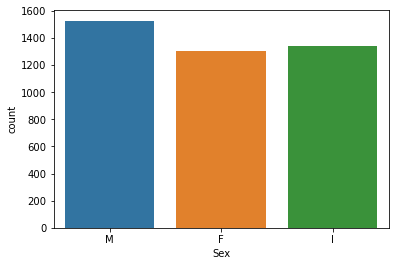

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [108]:
#univariate analysis
sns.countplot(df.Sex)
plt.show()
df.Sex.value_counts()

All the classes of Sex are balanced

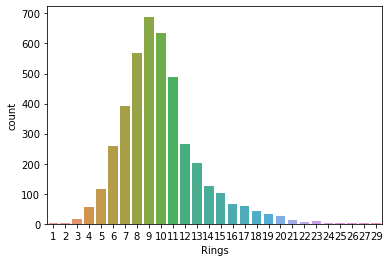

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [109]:
sns.countplot(df['Rings'])
plt.show()
df.Rings.value_counts()

We have many classes for Rings and they are highly imbalanced

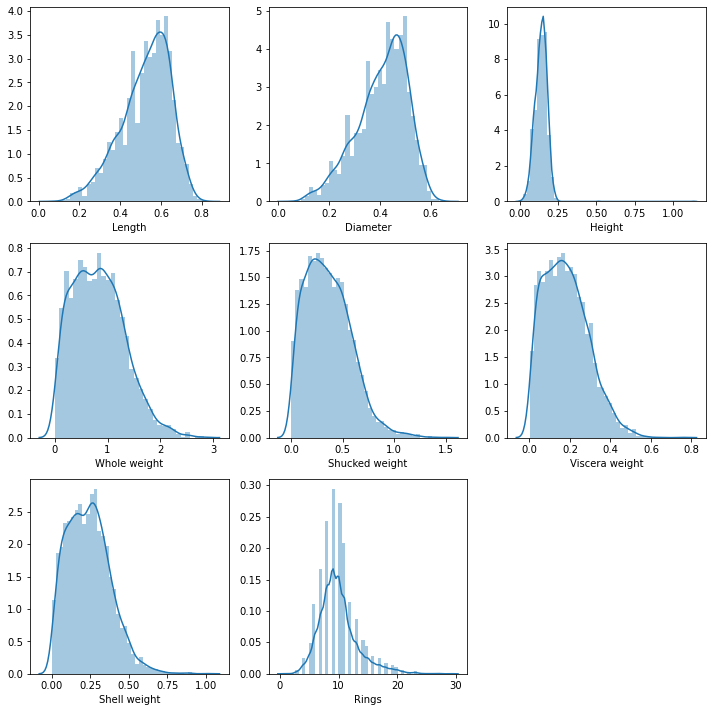

In [111]:
#visualising the distibution of each columns
j=1
plt.figure(figsize=(10,10))
for col in df.iloc[:,1:]:
    if j<=8:
        ax=plt.subplot(3,3,j)
        sns.distplot(df[col])
    j+=1
plt.tight_layout()

In [112]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

All the columns are very much skewed and need to be worked on

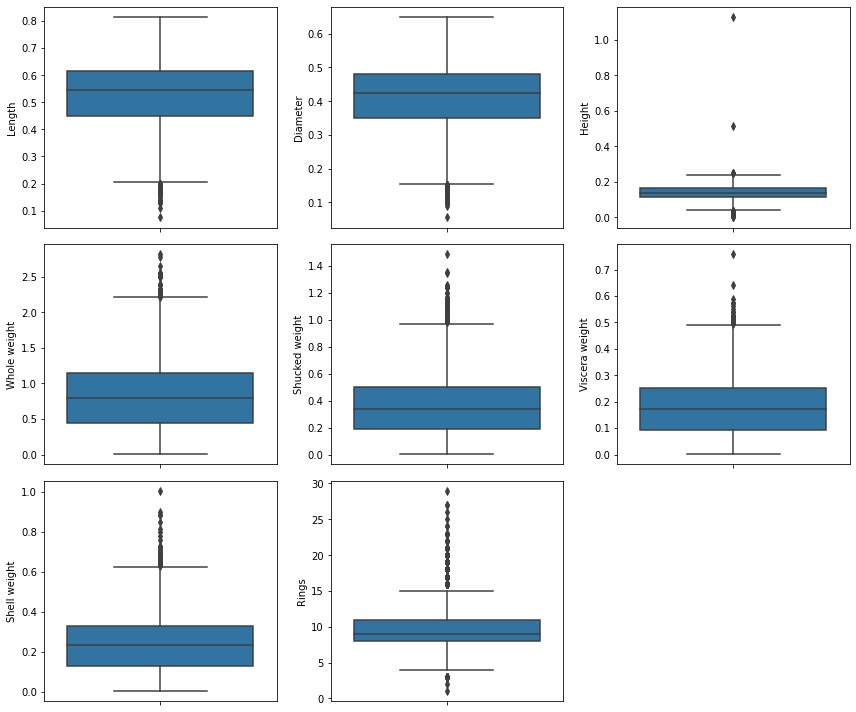

In [113]:
#boxplot of each coluumn
j=1
plt.figure(figsize=(12,10))
for col in df.iloc[:,1:]:
    if j<=8:
        ax=plt.subplot(3,3,j)
        sns.boxplot(df[col],orient='v')
    j+=1
plt.tight_layout()

Alll the columns have outliers

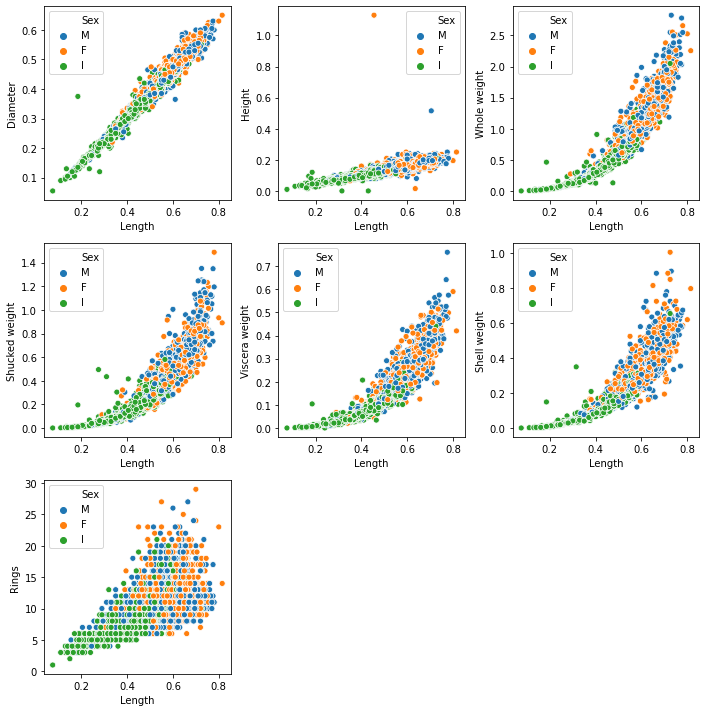

In [114]:
#bivariate analysis
#1)Length vs all the columns
j=1
plt.figure(figsize=(10,10))
for col in df.iloc[:,2:]:
    if j<=8:
        ax=plt.subplot(3,3,j)
        sns.scatterplot(df['Length'],df[col],hue=df['Sex'])
    j+=1
plt.tight_layout()

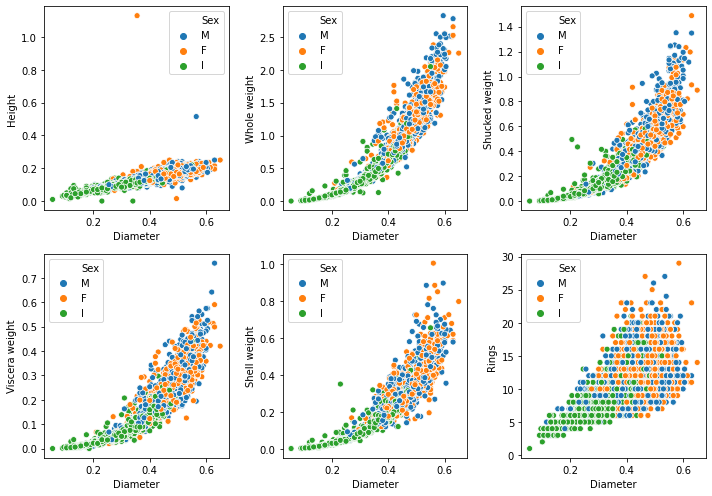

In [115]:
#2)Diameter vs all the remaining columns
features=['Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']
j=1
plt.figure(figsize=(10,7))
for col in df[features]:
    if j<=8:
        ax=plt.subplot(2,3,j)
        sns.scatterplot(df['Diameter'],df[col],hue=df['Sex'])
    j+=1
plt.tight_layout()

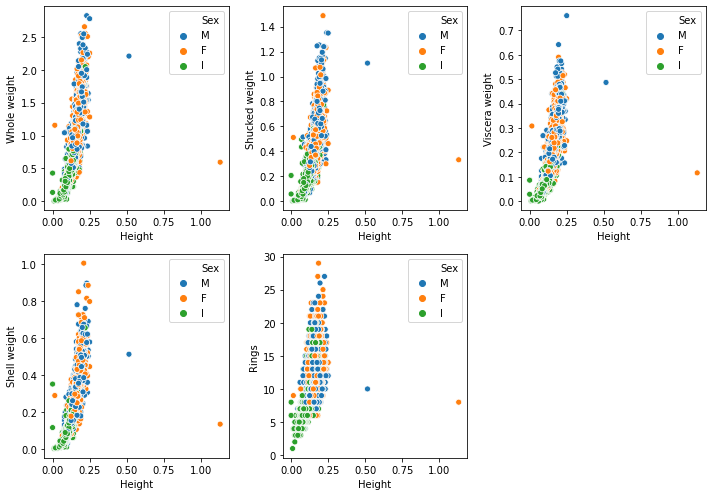

In [116]:
#3) Height vs all the remaining columns
features=['Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']
j=1
plt.figure(figsize=(10,7))
for col in df[features]:
    if j<=8:
        ax=plt.subplot(2,3,j)
        sns.scatterplot(df['Height'],df[col],hue=df['Sex'])
    j+=1
plt.tight_layout()

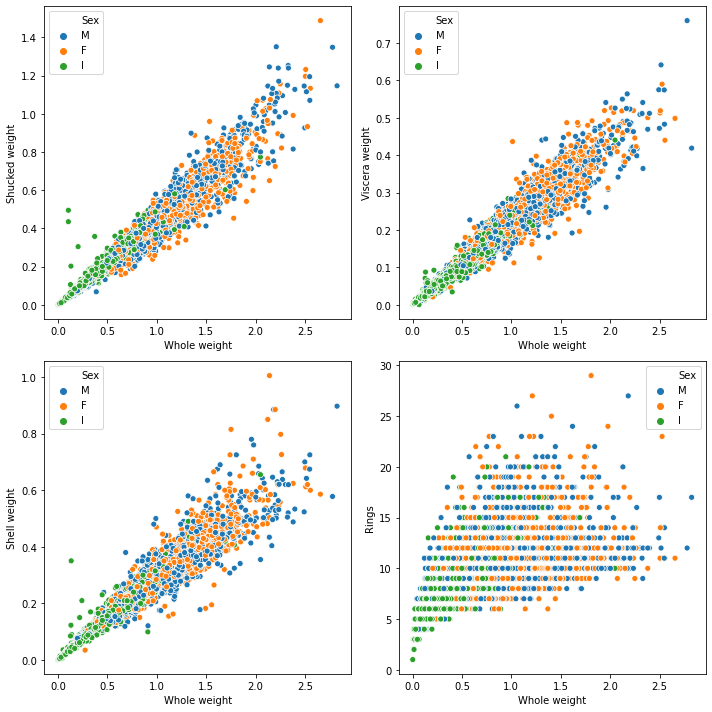

In [117]:
#4) Whole weight vs all the remaining columns
features=['Shucked weight','Viscera weight', 'Shell weight', 'Rings']
j=1
plt.figure(figsize=(10,10))
for col in df[features]:
    if j<=8:
        ax=plt.subplot(2,2,j)
        sns.scatterplot(df['Whole weight'],df[col],hue=df['Sex'])
    j+=1
plt.tight_layout()

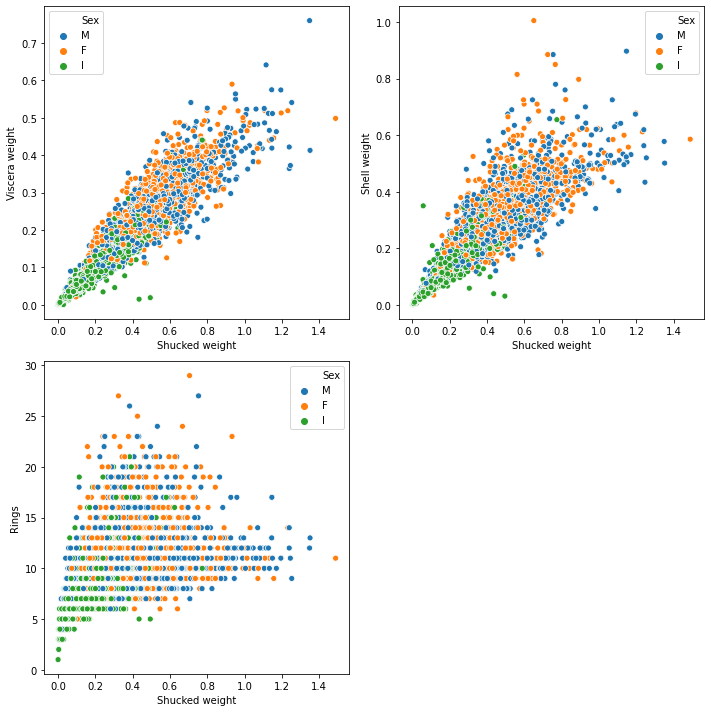

In [118]:
#5) Shucked weight vs all the remaining columns
features=['Viscera weight', 'Shell weight', 'Rings']
j=1
plt.figure(figsize=(10,10))
for col in df[features]:
    if j<=8:
        ax=plt.subplot(2,2,j)
        sns.scatterplot(df['Shucked weight'],df[col],hue=df['Sex'])
    j+=1
plt.tight_layout()

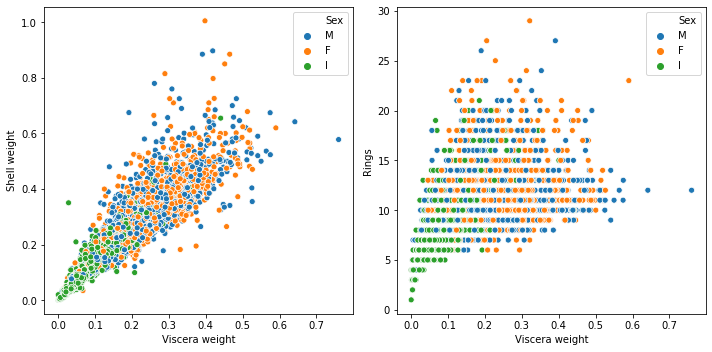

In [119]:
#6) Viscera weight vs all the remaining columns
features=['Shell weight', 'Rings']
j=1
plt.figure(figsize=(10,5))
for col in df[features]:
    if j<=8:
        ax=plt.subplot(1,2,j)
        sns.scatterplot(df['Viscera weight'],df[col],hue=df['Sex'])
    j+=1
plt.tight_layout()

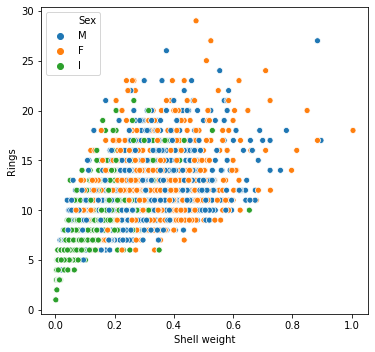

In [120]:
#6) Shell weight vs all the remaining column
features=['Rings']
j=1
plt.figure(figsize=(10,5))
for col in df[features]:
    if j<=8:
        ax=plt.subplot(1,2,j)
        sns.scatterplot(df['Shell weight'],df[col],hue=df['Sex'])
    j+=1
plt.tight_layout()

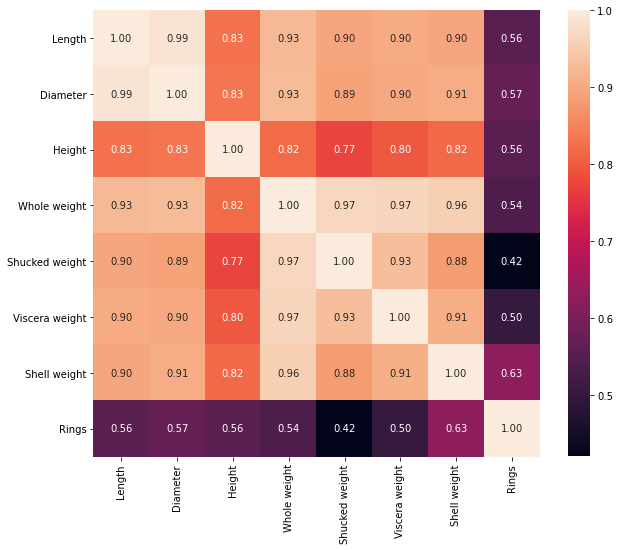

In [121]:
#Multivariate analysis using corelation plot
plt.figure(figsize=(10,10))
corr=df.iloc[:,1:].corr()
sns.heatmap(corr,cbar=True,square=True,cbar_kws={"shrink":.82},fmt='.2f',annot=True,annot_kws={'size':10})

We can see that all the columns are very highly corelated with each other

In [122]:
#Removing spaces between column names
df.columns = [c.replace(' ', '_') for c in df.columns]

In [123]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [124]:
# removind outliers using quantile method:
df2=df
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1

highindex=np.where(df['Length']>(q3.Length+(1.5*iqr.Length)))
lowindex=np.where(df['Length']<(q1.Length-(1.5*iqr.Length)))
df=df.drop(df.index[highindex])
df=df.drop(df.index[lowindex])

highindex=np.where(df['Diameter']>(q3.Diameter+(1.5*iqr.Diameter)))
lowindex=np.where(df['Diameter']<(q1.Diameter-(1.5*iqr.Diameter)))
df=df.drop(df.index[highindex])
df=df.drop(df.index[lowindex])

highindex=np.where(df['Height']>(q3.Height+(1.5*iqr.Height)))
lowindex=np.where(df['Height']<(q1.Height-(1.5*iqr.Height)))
df=df.drop(df.index[highindex])
df=df.drop(df.index[lowindex])

highindex=np.where(df['Whole_weight']>(q3.Whole_weight+(1.5*iqr.Whole_weight)))
lowindex=np.where(df['Whole_weight']<(q1.Whole_weight-(1.5*iqr.Whole_weight)))
df=df.drop(df.index[highindex])
df=df.drop(df.index[lowindex])

highindex=np.where(df['Shucked_weight']>(q3.Shucked_weight+(1.5*iqr.Shucked_weight)))
lowindex=np.where(df['Shucked_weight']<(q1.Shucked_weight-(1.5*iqr.Shucked_weight)))
df=df.drop(df.index[highindex])
df=df.drop(df.index[lowindex])

highindex=np.where(df['Viscera_weight']>(q3.Viscera_weight+(1.5*iqr.Viscera_weight)))
lowindex=np.where(df['Viscera_weight']<(q1.Viscera_weight-(1.5*iqr.Viscera_weight)))
df=df.drop(df.index[highindex])
df=df.drop(df.index[lowindex])

highindex=np.where(df['Shell_weight']>(q3.Shell_weight+(1.5*iqr.Shell_weight)))
lowindex=np.where(df['Shell_weight']<(q1.Shell_weight-(1.5*iqr.Shell_weight)))
df=df.drop(df.index[highindex])
df=df.drop(df.index[lowindex])

highindex=np.where(df['Rings']>(q3.Rings+(1.5*iqr.Rings)))
lowindex=np.where(df['Rings']<(q1.Rings-(1.5*iqr.Rings)))
df=df.drop(df.index[highindex])
df=df.drop(df.index[lowindex])


df.reset_index(inplace=True,drop=True)

In [125]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
3776,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
3777,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
3778,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
3779,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


We have 3781 rows after removing outliers

In [126]:
(df2.shape[0]-df.shape[0])/df2.shape[0]*100

9.480488388795786

we loose roughly 9.5 percent data after removing outliers

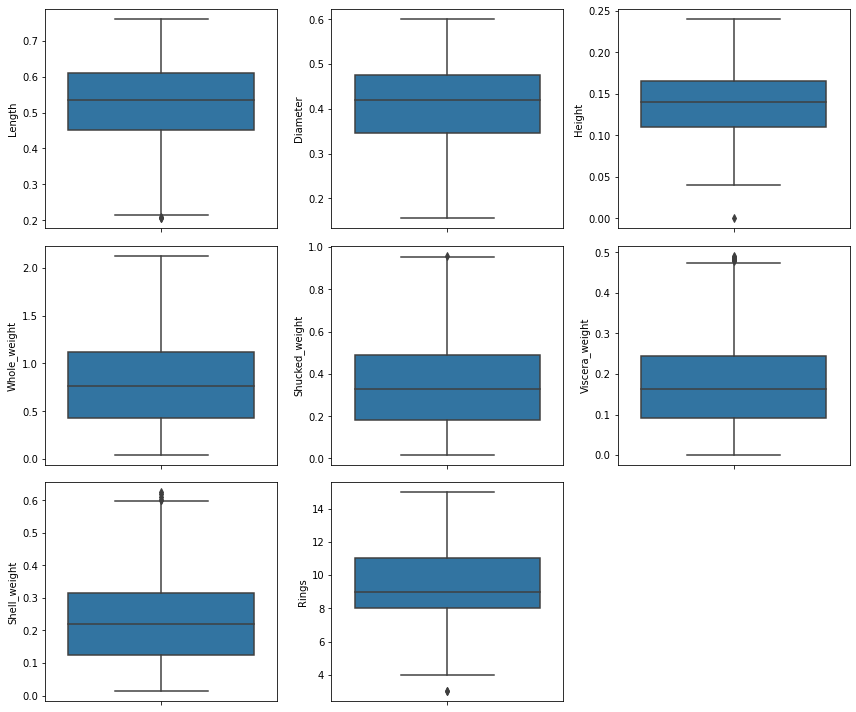

In [127]:
#Checking for outliers
j=1
plt.figure(figsize=(12,10))
for col in df.iloc[:,1:]:
    if j<=8:
        ax=plt.subplot(3,3,j)
        sns.boxplot(df[col],orient='v')
    j+=1
plt.tight_layout()

The outliers are largely removed

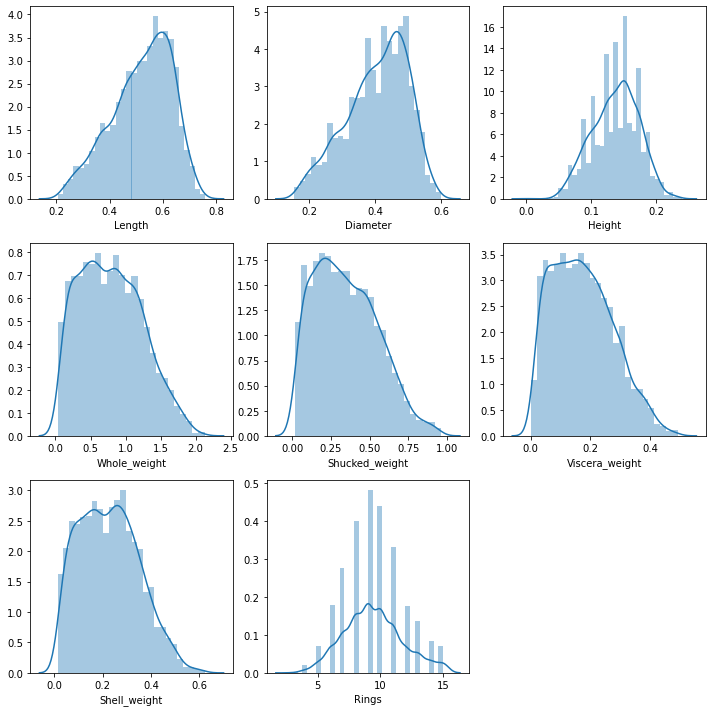

In [128]:
#checking the skewness after removing the outliers
j=1
plt.figure(figsize=(10,10))
for col in df.iloc[:,1:]:
    if j<=8:
        ax=plt.subplot(3,3,j)
        sns.distplot(df[col])
    j+=1
plt.tight_layout()

In [129]:
df.skew()

Length           -0.497288
Diameter         -0.483944
Height           -0.167065
Whole_weight      0.345878
Shucked_weight    0.456067
Viscera_weight    0.455393
Shell_weight      0.341812
Rings             0.260958
dtype: float64

The skewness is reduced to less than 0.5 

In [130]:
#encoding Sex column
df2=pd.get_dummies(df['Sex'],drop_first=False)
df=df.join(df2)
df.drop('Sex',axis=1,inplace=True)
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [131]:
#spliting dataset into features and lables
X=df.drop('Rings',axis=1)
y=df['Rings']

In [132]:
#scaling features (except the sex column)
scaler=StandardScaler()
scaled=scaler.fit_transform(X.iloc[:,:7])

In [133]:
#checking multicollinearity using variation inflation method  
z=X.iloc[:,:7]
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['Features']=z.columns
vif

,vif,Features
0,39.750297,Length
1,40.392770,Diameter
2,6.379445,Height
3,106.118813,Whole_weight
4,29.116162,Shucked_weight
5,17.143899,Viscera_weight
6,21.922409,Shell_weight


We can see very high Vif values for all the columns.. We need to remove columns which has higher values

In [134]:
z=z.drop(['Whole_weight','Diameter','Viscera_weight','Length','Shell_weight'],axis=1)
scaled=scaler.fit_transform(z)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['Features']=z.columns
vif

,vif,Features
0,3.577368,Height
1,3.577368,Shucked_weight


To bring vif to below 5, six column was needed to be removed

In [135]:
x_scaled=pd.DataFrame(data=scaled,columns=z.columns)
x_scaled=pd.concat([x_scaled,X.iloc[:,7:]],axis=1)
x_scaled

,Height,Shucked_weight,F,I,M
0,-1.192920,-0.602322,0,0,1
1,-1.334171,-1.216205,0,0,1
2,-0.062911,-0.445168,1,0,0
3,-0.345413,-0.646521,0,0,1
4,-1.616673,-1.265315,0,1,0
...,...,...,...,...,...
3776,0.784596,0.112238,1,0,0
3777,-0.062911,0.451102,0,0,1
3778,1.914605,0.875909,0,0,1
3779,0.360842,0.902920,1,0,0


In [84]:
#Geting the best random state
maxsc=0
maxrs=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxsc:
        maxsc=acc
        maxrs=i
print('Maximum score:',maxsc,'\nBest Random State:',maxrs)

Maximum score: 0.23784355179704017 
Best Random State: 109


In [136]:
#Spliting data into traning and testing sets using the best random state
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=maxrs)

In [137]:
#Models used for the analysis
rfc=RandomForestClassifier()
lr=LogisticRegression()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
svc=SVC()

In [138]:
#checking accuracy and cross validation score for the selected models using training data
acc=[]
cv=[]
diff=[]
j=0
models=[rfc,lr,knc,dtc,bc,gbc,svc]
for i in models:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    acc.append(accuracy_score(y_test,pred))
    cv.append(cross_val_score(i,X_train,y_train,cv=5).mean())
    diff.append(acc[j]-cv[j])
    j+=1
best_model=pd.DataFrame({'Model Name':[str(i).replace('(','').replace(')','') for i in models],
                     'Accuracy':acc,
                     'Cross Validation Score':cv,'Difference':np.abs(diff)})
best_model.sort_values(by='Difference')

,Model Name,Accuracy,Cross Validation Score,Difference
5,GradientBoostingClassifier,0.250801,0.244771,0.006030
4,BaggingClassifier,0.211538,0.202137,0.009402
6,SVC,0.285256,0.267275,0.017982
1,LogisticRegression,0.286058,0.268069,0.017989
3,DecisionTreeClassifier,0.213141,0.189107,0.024034
2,KNeighborsClassifier,0.232372,0.204101,0.028271
0,RandomForestClassifier,0.222756,0.192659,0.030098


I am choosing Logistic regression because it has higher accuracy and also a decent difference between the Accuracy score and Cross validation Score

In [139]:
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
             'penalty' : ['l2'],
             'C' : [100, 10, 1.0, 0.1, 0.01]}

In [101]:
#Applying Grid Search CV to find the best parameters
grd=GridSearchCV(lr,param_grid=param_grid,scoring='accuracy')
grd.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(C=10),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [140]:
#the best parameters
grd.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [141]:
#instantiating the best parameter to the model
lr=grd.best_estimator_

In [142]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [143]:
accuracy_score(y_test,y_pred)

0.28926282051282054

we can see very slight increase in the accuracy score

In [144]:
#saving the model
filename = 'Mushroom_Practice_Project'
pickle.dump(rfc, open(filename, 'wb'))